### PCA with linear auroencoder

In [25]:
import numpy as np
import pandas as pd
import matplotlib as plt
import tensorflow as tf
import keras


Create 3D Random Data

In [20]:
np.random.seed(10)

def generate_3d_data(m, w1=0.2, w2=0.6, noise=0.2):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

Visualise our 3D data

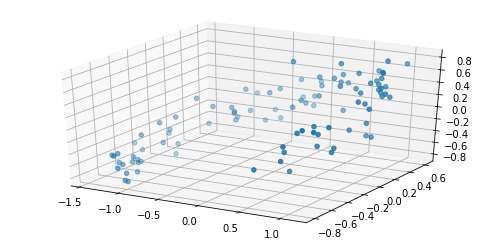

In [21]:
from mpl_toolkits.mplot3d import Axes3D
v= X_train
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(v[:,0],v[:,1],v[:,2])
plt.show()


### Build the AutoEncoder

This is a linear model - with no activation functions

In [27]:
np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])

autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=20)

In [29]:
codings = encoder.predict(X_train)

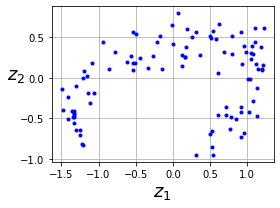

In [32]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
